## INSTALLATION OF LIBRARIES

In [1]:
!pip install kagglehub

In [2]:
!pip install pillow requests colorthief seaborn matplotlib pandas


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikhil1e9/goodreads-books")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tejas\.cache\kagglehub\datasets\nikhil1e9\goodreads-books\versions\6


In [4]:
!pip install wordcloud
!pip install TextBlob

In [5]:
# Basic data manipulation
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For text analysis 
from wordcloud import WordCloud
from textblob import TextBlob
from PIL import Image
import requests
from io import BytesIO


# LOADING AND VIEWING DATA

Title:        Title of the book

Author:       Author of the book

Score:        Average user rating/score of the book

Ratings:      Total number of ratings given to the book by users

Shelvings:    Total number of users having the book saved on their Goodreads account

Published:    The year in which the book was published

Description:  Description of the book

Image:        Image URL of the book

In [6]:
# Load the dataset
df = pd.read_csv("LARA\DATASETS\Popular-Books.csv")
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        27621 non-null  object 
 1   Author       27621 non-null  object 
 2   Score        27621 non-null  float64
 3   Ratings      27621 non-null  int64  
 4   Shelvings    27621 non-null  int64  
 5   Published    27621 non-null  int64  
 6   Description  27549 non-null  object 
 7   Image        27621 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 1.7+ MB


Title           0
Author          0
Score           0
Ratings         0
Shelvings       0
Published       0
Description    72
Image           0
dtype: int64

In [7]:
df.head()

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image
0,"The English Assassin (Gabriel Allon, #2)",Daniel Silva,4.16,40122,44602,2002,"The Unlikely Spy, Daniel Silva's extraordinary...",https://images-na.ssl-images-amazon.com/images...
1,Pompeii,Robert Harris,3.86,46097,64840,2003,With his trademark elegance and intelligence R...,https://images-na.ssl-images-amazon.com/images...
2,Notorious RBG: The Life and Times of Ruth Bade...,Irin Carmon,4.19,59670,171959,2015,You can't spell truth without Ruth.Only Ruth B...,https://images-na.ssl-images-amazon.com/images...
3,The Abolition of Man,C.S. Lewis,4.11,34390,52770,1943,Alternative cover for ISBN: 978-0060652944The ...,https://images-na.ssl-images-amazon.com/images...
4,Portrait of a Murderer,Anne Meredith (Pseudonym),3.38,1129,1739,1933,'Adrian Gray was born in May 1862 and met his ...,https://images-na.ssl-images-amazon.com/images...


# DATA CLEANING

In [8]:
#Hnadling missing values in "Description" column
df['Description'].fillna('No description available', inplace=True)


In [9]:
#Confirming again
df.isnull().sum()

Title          0
Author         0
Score          0
Ratings        0
Shelvings      0
Published      0
Description    0
Image          0
dtype: int64

# FEATURE ENGINEERING

In [10]:
# The average score of books written by the same author
df['Author_Avg_Score'] = df.groupby('Author')['Score'].transform('mean')

# Calculating popularity by ratings and shelvings
df['Rating_Shelving_Ratio'] = df['Ratings'] / (df['Shelvings'] + 1)

# The age of the book with respect to published year
current_year = datetime.datetime.now().year
df['Book_Age'] = current_year - df['Published']

# Multiple books by same author
df['Author_Book_Count'] = df.groupby('Author')['Author'].transform('count')



In [11]:
df.head()

,Title,Author,Score,Ratings,Shelvings,Published,Description,Image,Author_Avg_Score,Rating_Shelving_Ratio,Book_Age,Author_Book_Count
0,"The English Assassin (Gabriel Allon, #2)",Daniel Silva,4.16,40122,44602,2002,"The Unlikely Spy, Daniel Silva's extraordinary...",https://images-na.ssl-images-amazon.com/images...,4.20750,0.899536,23,4
1,Pompeii,Robert Harris,3.86,46097,64840,2003,With his trademark elegance and intelligence R...,https://images-na.ssl-images-amazon.com/images...,3.97000,0.710924,22,4
2,Notorious RBG: The Life and Times of Ruth Bade...,Irin Carmon,4.19,59670,171959,2015,You can't spell truth without Ruth.Only Ruth B...,https://images-na.ssl-images-amazon.com/images...,4.19000,0.346999,10,1
3,The Abolition of Man,C.S. Lewis,4.11,34390,52770,1943,Alternative cover for ISBN: 978-0060652944The ...,https://images-na.ssl-images-amazon.com/images...,4.14413,0.651684,82,46
4,Portrait of a Murderer,Anne Meredith (Pseudonym),3.38,1129,1739,1933,'Adrian Gray was born in May 1862 and met his ...,https://images-na.ssl-images-amazon.com/images...,3.38000,0.648851,92,1


# EXPLORATORY DATA ANALYSIS

## General Overview

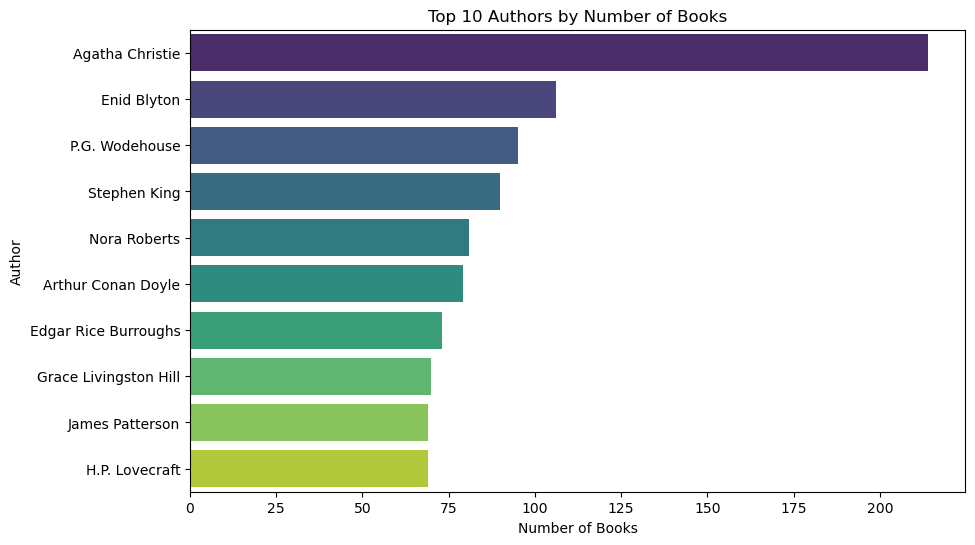

In [12]:
#Top authors by Book Count
import matplotlib.pyplot as plt
import seaborn as sns

top_authors = df['Author'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette='viridis')
plt.title('Top 10 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()


C:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


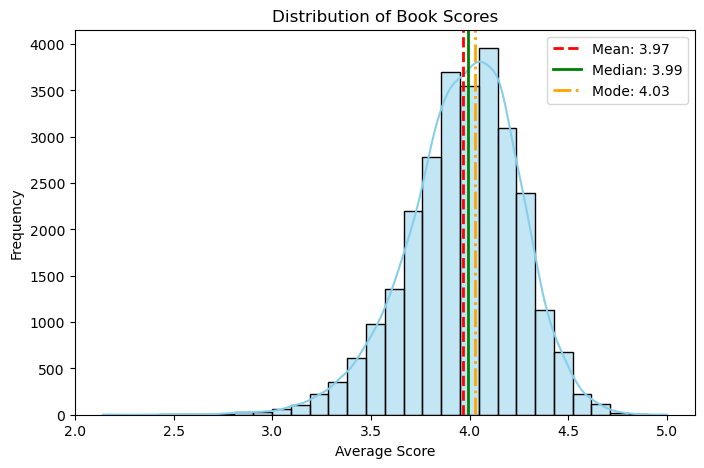

In [13]:
#Score Distribution

# Calculate mean, median, and mode
mean_score = df['Score'].mean()
median_score = df['Score'].median()
mode_score = df['Score'].mode()[0]  # mode() returns a Series

# Plotting the distribution with mean, median, and mode
plt.figure(figsize=(8, 5))
sns.histplot(df['Score'], bins=30, kde=True, color='skyblue')

# Plot mean
plt.axvline(mean_score, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_score:.2f}')

# Plot median
plt.axvline(median_score, color='green', linestyle='-', linewidth=2, label=f'Median: {median_score:.2f}')

# Plot mode
plt.axvline(mode_score, color='orange', linestyle='-.', linewidth=2, label=f'Mode: {mode_score:.2f}')


plt.title('Distribution of Book Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()



CONCLUSIONS:

Books tend to get higher ratings, as indicated by the mode being higher than the mean and median.

The distribution is close to normal with a slight left skew, which reflects more positive ratings but also some low ratings.

The platform is mostly filled with well-received books, and books with low ratings are less frequent.


## Correlation Analysis

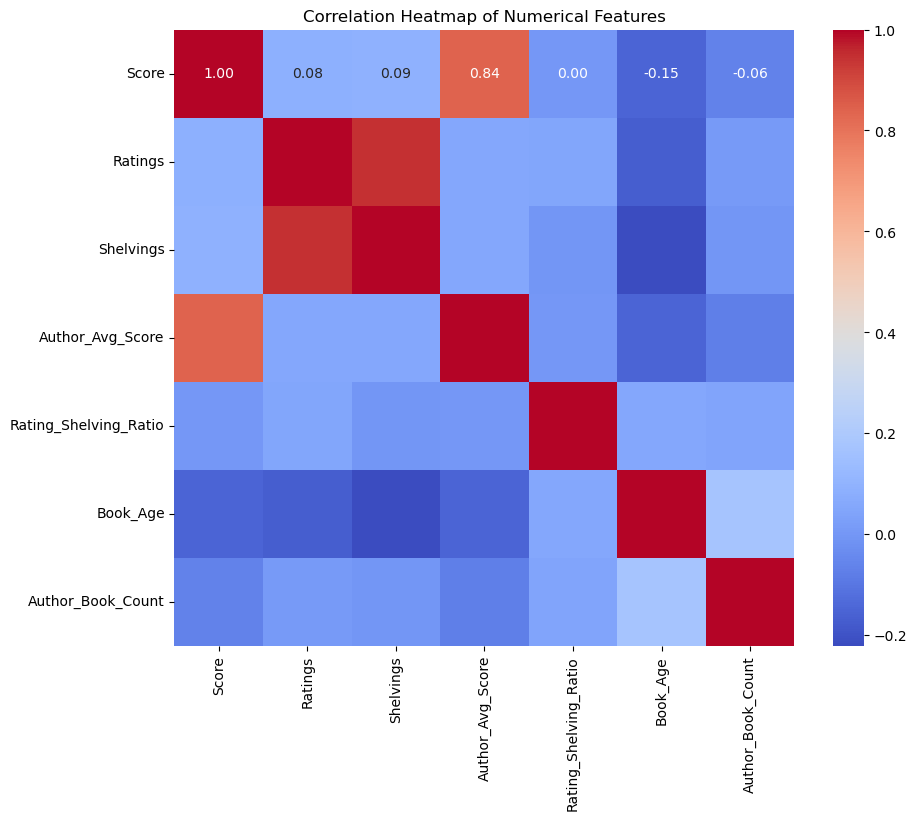

In [24]:
# HeatMap
correlation = df[['Score','Ratings','Shelvings','Author_Avg_Score','Rating_Shelving_Ratio','Book_Age','Author_Book_Count']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


CONCLUSIONS:
    
The higher the rating of a book, the more likely it is that users will save it on their shelves. Books with high ratings likely  are well-known
        
A book's score is significantly influenced by the author's average rating across all their books. Popular authors or well-established authors tend to maintain a certain level of quality.



## Popularity Insights

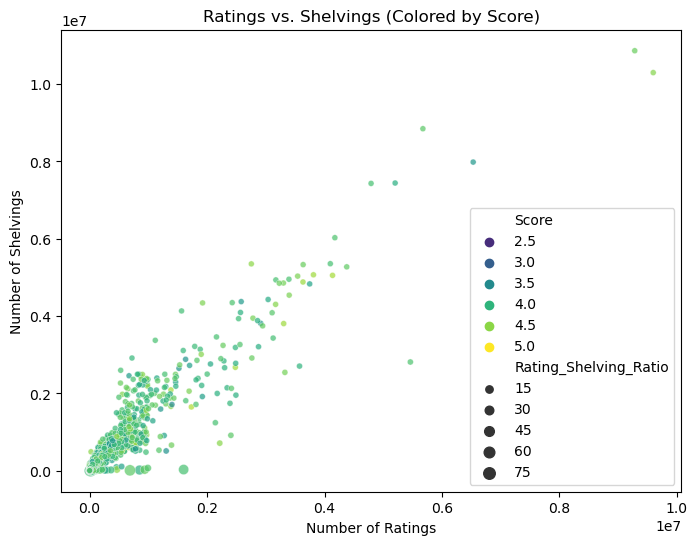

In [18]:
# Ratings vs Shelvings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Ratings', y='Shelvings', hue='Score', size='Rating_Shelving_Ratio', data=df, alpha=0.7, palette='viridis')
plt.title('Ratings vs. Shelvings (Colored by Score)')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Shelvings')
plt.legend()
plt.show()


CONCLUSIONS:

There's a clear positive correlation between ratings and shelvings. Books with more ratings tend to have more shelvings.

Larger dots indicate a higher ratio of ratings to shelvings. This might suggest books that people are more likely to rate after shelving, potentially indicating stronger engagement or a more "discussable" nature.



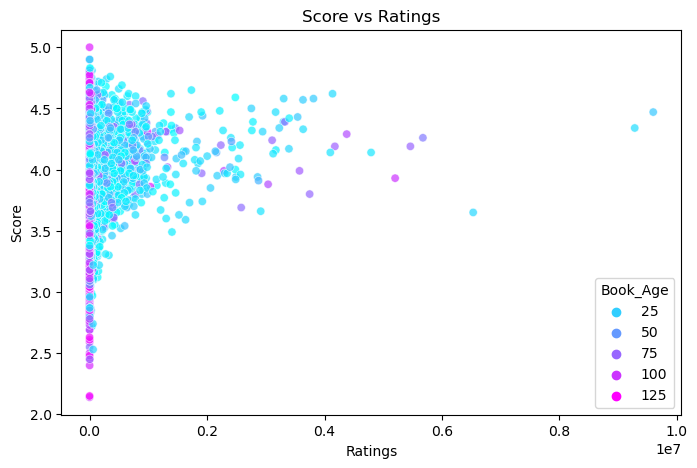

In [27]:
# Investigate if books with higher scores have more ratings.

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Ratings', y='Score', hue='Book_Age', palette='cool', alpha=0.7)
plt.title('Score vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Score')
plt.show()


CONCLUSIONS:

There's a clear tendency towards higher scores, suggesting that books with more ratings tend to be better received.

There's a general trend where books with higher ratings tend to have higher scores.

Older books (with Book_Age of 100 or 125) seem to be more concentrated in the lower-rating and lower-score region. 

Newer books (with Book_Age of 25 or 50) are more spread out across the plot, indicating a wider range of scores and ratings. 


## Time Series Analysis

C:\Users\tejas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


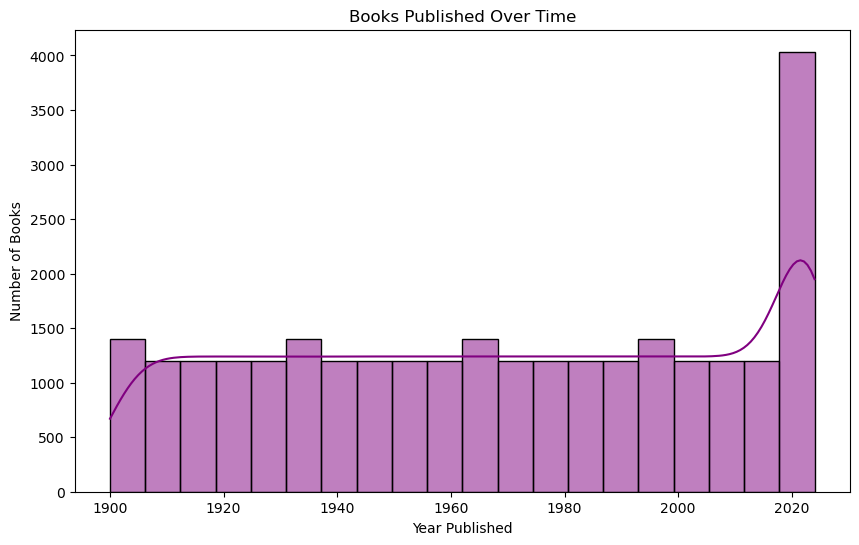

In [31]:
# Books published over time
plt.figure(figsize=(10, 6))
sns.histplot(df['Published'], bins=20, kde=True, color='purple')
plt.title('Books Published Over Time')
plt.xlabel('Year Published')
plt.ylabel('Number of Books')
plt.show()


CONCLUSION:

The most striking feature is the dramatic increase in book production in the late 20th and early 21st centuries.


    

## Author Influence Analysis


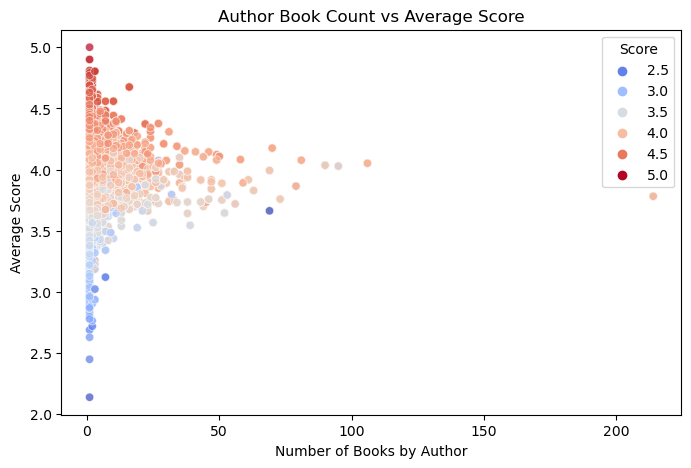

In [28]:
# Authors with more books having higher or lower avgerage scores
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Author_Book_Count', y='Author_Avg_Score', hue='Score', palette='coolwarm', alpha=0.7)
plt.title('Author Book Count vs Average Score')
plt.xlabel('Number of Books by Author')
plt.ylabel('Average Score')
plt.show()



CONCLUSIONS:

A group of authors with high average scores (around 4.5 or higher) who have written relatively few books (less than 50).

A larger group of authors with lower average scores (around 3.5 or lower) who have written more books. This suggests that as authors write more, it becomes more difficult to consistently produce highly rated works.

There are a few outliers, such as authors with many books who have high average scores



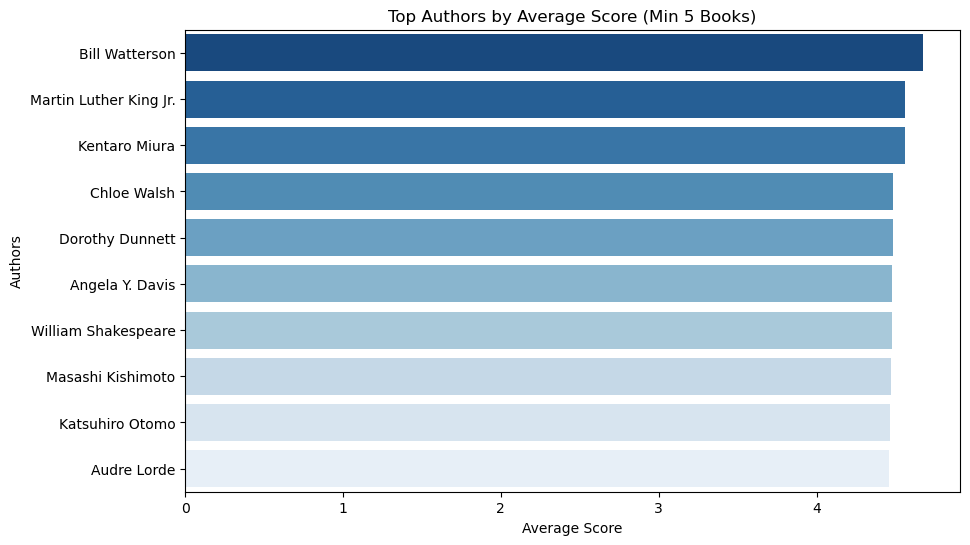

In [29]:
# Identify top authors with the highest average scores
top_authors_avg = df.groupby('Author').filter(lambda x: len(x) >= 5).groupby('Author')['Author_Avg_Score'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_authors_avg.values, y=top_authors_avg.index, palette="Blues_r")
plt.title("Top Authors by Average Score (Min 5 Books)")
plt.xlabel("Average Score")
plt.ylabel("Authors")
plt.show()


## HYPOTHESIS TESTING

## Hypothesis-1

Null Hypothesis (H₀): There is no significant difference in scores between books with higher ratings and those with lower ratings.

Alternative Hypothesis (H₁): Books with higher ratings tend to have higher scores.


In [37]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


# Books with higher ratings tend to have higher scores
ratings_high = df[df['Ratings'] > df['Ratings'].median()]['Score']
ratings_low = df[df['Ratings'] <= df['Ratings'].median()]['Score']

t_stat, p_value = stats.ttest_ind(ratings_high, ratings_low)
print("Hypothesis 1 - T-test result:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if (p_value<0.05):
    print("Rejecting H0: There is a significant difference")
else:
    print("Accepting the initial hypothesis")

Hypothesis 1 - T-test result:
T-statistic: 29.189446565565824, P-value: 1.6772350886795289e-184
Rejecting H0: There is a significant difference


## Hypothesis-2

Null Hypothesis (H₀): There is no significant difference in the average ratings between books with more shelves and fewer shelves.

Alternative Hypothesis (H₁): Books with more shelves tend to have higher ratings.

In [40]:
# Hypothesis 2: Books with more shelves tend to have higher ratings
shelves_high = df[df['Shelvings'] > df['Shelvings'].median()]['Score']
shelves_low = df[df['Shelvings'] <= df['Shelvings'].median()]['Score']

t_stat, p_value = stats.ttest_ind(shelves_high, shelves_low)
print("\nHypothesis 2 - T-test result:")
print(f"T-statistic: {t_stat}, P-value: {p_value}")
      
if (p_value<0.05):
    print("Rejecting H0: There is a significant difference")
else:
    print("Accepting the initial hypothesis")



Hypothesis 2 - T-test result:
T-statistic: 21.891390374779018, P-value: 2.471195994409735e-105
Rejecting H0: There is a significant difference


## Hypothesis-3


Null Hypothesis (H₀): The number of books an author has written does not significantly affect the average score of their books.

Alternative Hypothesis (H₁): Authors who have written more books tend to have lower average scores for their books.

In [41]:
# The number of books an author has written affects their average score
df['Author_Book_Count_Group'] = pd.cut(df['Author_Book_Count'], bins=[0, 10, 50, 100, 500], labels=['Few', 'Medium', 'Many', 'Very Many'])

# ANOVA to test if author book count group affects the average score
anova_stat, p_value = stats.f_oneway(df[df['Author_Book_Count_Group'] == 'Few']['Author_Avg_Score'],
                                      df[df['Author_Book_Count_Group'] == 'Medium']['Author_Avg_Score'],
                                      df[df['Author_Book_Count_Group'] == 'Many']['Author_Avg_Score'],
                                      df[df['Author_Book_Count_Group'] == 'Very Many']['Author_Avg_Score'])

print("\nHypothesis 4 - ANOVA result:")
print(f"ANOVA statistic: {anova_stat}, P-value: {p_value}")

if (p_value<0.05):
    print("Rejecting H0: There is a significant difference")
else:
    print("Accepting the initial hypothesis")


Hypothesis 4 - ANOVA result:
ANOVA statistic: 53.67286729509171, P-value: 1.3918411939070824e-34
Rejecting H0: There is a significant difference
